### Local electric field pattern in a dielectric

In [1]:
import numpy as np

Define the properties of the carbon atom electron clouds in diamond.

In [62]:
q = 4*1.602e-19 # charge of n=2 electrons
a = 1.87e-13 # representative dipole separation
alpha = 50e-12 # representative size of electron cloud
delta = 1.53e-10 # atomic separation

Define locations of atoms in crystal lattice.

In [63]:
x = np.arange(-10, 10+1e-6, 1)*delta
y = x.copy()
z = x.copy()

Define set of locations near centre of lattice to probe electric field strength.

In [64]:
dx = np.arange(0, 1+1e-6, 0.5e-1)*delta
dy = dx.copy()
dz = np.arange(-0.5, 2.5+1e-6, 0.5e-1)*delta

Define function to calculate local electric field (z-component) around dipoles.

In [77]:
def local_field(dx, dy, dz):
    E = np.zeros((len(dx), len(dy), len(dz)))
    for i in range(0, len(x)):
        for j in range(0, len(y)):
            for k in range(0, len(z)):
                #if not (x[i] == 0 and y[j] == 0 and z[k] == 0):
                E = E + (q*a)*((3*(z[k] - dz[None,None,:])**2 - (x[i] - dx[:,None,None])**2 - (y[j] - dy[None,:,None])**2 - (z[k] - dz[None,None,:])**2 + 3*alpha**2)/((x[i] - dx[:,None,None])**2 + (y[j] - dy[None,:,None])**2 + (z[k] - dz[None,None,:])**2 + alpha**2)**(5/2.))
    return E

Calculate z-component of local electric field at specified locations.

In [78]:
E = local_field(dx, dy, dz)

Calculate mean value of local electric field.

In [79]:
mean = np.average(E)
mean

0.45268347814750176

Create plot of local electric field at several cross-sections through the lattice.

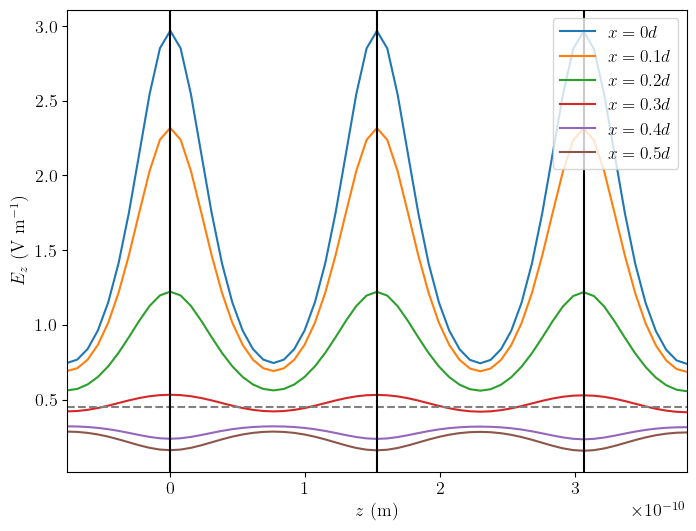

In [80]:
import matplotlib.pyplot as plt
from matplotlib import rc

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

rc('text', usetex=True)
rc('font', size=13)
rc('legend', fontsize=12.5)
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
    
ax.plot(dz, E[0,0,:], label='$x=0d$')
ax.plot(dz, E[0,2,:], label='$x=0.1d$')
ax.plot(dz, E[0,4,:], label='$x=0.2d$')
ax.plot(dz, E[0,6,:], label='$x=0.3d$')
ax.plot(dz, E[0,8,:], label='$x=0.4d$')
ax.plot(dz, E[0,10,:], label='$x=0.5d$')

ax.plot(dz, mean + 0*dz, 'grey', linestyle='dashed')

ax.set_xlabel(r'$z$ (m)')
ax.set_ylabel(r'$E_z$ (V m$^{-1}$)')

ax.axvline(0, c='k')
ax.axvline(delta, c='k')
ax.axvline(2*delta, c='k')

ax.legend(loc=1)
ax.set_xlim(-0.5*delta,2.5*delta)

plt.show()